In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline
import seaborn as sn

In [2]:
import geopandas as gpd
import pandas as pd

### Load the 50 citis data

### Heatwave Count

In [3]:
heatwave_count = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/city_heatwave_count_monthly_1961_2021.csv").drop(columns={'Unnamed: 0'})
heatwave_count

,year,month,city_name,heatwave_count
0,1961,1,Albany,0
1,1961,1,Albuquerque,0
2,1961,1,Allentown,0
3,1961,1,Atlanta,0
4,1961,1,Austin,0
...,...,...,...,...
36088,2021,12,Seattle,0
36089,2021,12,St. Louis,0
36090,2021,12,Tampa,0
36091,2021,12,Tucson,0


In [4]:
heatwave_count['heatwave_count'].describe()

count    36093.000000
mean         0.078824
std          0.406801
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: heatwave_count, dtype: float64

In [5]:
heatwave_count = heatwave_count.drop('month', axis = 1)
heatwave_count = heatwave_count.groupby(['year', 'city_name']).sum()
heatwave_count = heatwave_count.reset_index()
heatwave_count.head()

,year,city_name,heatwave_count
0,1961,Albany,1
1,1961,Albuquerque,0
2,1961,Allentown,0
3,1961,Atlanta,0
4,1961,Austin,0


In [6]:
def printCityNumbers(df, years):
    city_numbers = []
    for year in years:
        dict_year = {}
        df_year = df[df['year'] == year]
        numbers = len(df_year['city_name'].unique())
        dict_year[year] = numbers
        city_numbers.append(dict_year)
    return city_numbers

In [7]:
len(heatwave_count['city_name'].unique())

50

In [8]:
years = [year for year in range(1961, 2022)]

In [9]:
city_numbers_Count = printCityNumbers(heatwave_count, years)
city_numbers_Count

[{1961: 50},
 {1962: 50},
 {1963: 50},
 {1964: 50},
 {1965: 50},
 {1966: 50},
 {1967: 50},
 {1968: 50},
 {1969: 50},
 {1970: 50},
 {1971: 50},
 {1972: 50},
 {1973: 50},
 {1974: 50},
 {1975: 50},
 {1976: 50},
 {1977: 50},
 {1978: 50},
 {1979: 50},
 {1980: 50},
 {1981: 50},
 {1982: 50},
 {1983: 50},
 {1984: 50},
 {1985: 50},
 {1986: 50},
 {1987: 50},
 {1988: 50},
 {1989: 50},
 {1990: 50},
 {1991: 50},
 {1992: 50},
 {1993: 50},
 {1994: 50},
 {1995: 50},
 {1996: 50},
 {1997: 50},
 {1998: 50},
 {1999: 50},
 {2000: 50},
 {2001: 50},
 {2002: 50},
 {2003: 50},
 {2004: 50},
 {2005: 50},
 {2006: 50},
 {2007: 50},
 {2008: 50},
 {2009: 50},
 {2010: 50},
 {2011: 50},
 {2012: 50},
 {2013: 50},
 {2014: 50},
 {2015: 50},
 {2016: 50},
 {2017: 50},
 {2018: 50},
 {2019: 50},
 {2020: 50},
 {2021: 50}]

In [10]:
def findDecade(year):
    if year >= 1961 and year <= 1970:
        return '1960s'
    elif year >= 1971 and year <= 1980:
        return '1970s'
    elif year >= 1981 and year <= 1990:
        return '1980s'
    elif year >= 1991 and year <= 2000:
        return '1990s'
    elif year >= 2001 and year <= 2010:
        return '2000s'
    elif year >= 2011 and year <= 2020:
        return '2010s'
    else:
        return '2020s'

In [11]:
heatwave_count['decade'] = heatwave_count['year'].apply(findDecade)
heatwave_count

,year,city_name,heatwave_count,decade
0,1961,Albany,1,1960s
1,1961,Albuquerque,0,1960s
2,1961,Allentown,0,1960s
3,1961,Atlanta,0,1960s
4,1961,Austin,0,1960s
...,...,...,...,...
3045,2021,Seattle,1,2020s
3046,2021,St. Louis,0,2020s
3047,2021,Tampa,9,2020s
3048,2021,Tucson,0,2020s


In [12]:
len(heatwave_count['city_name'].unique())

50

In [13]:
heatwave_count.columns

Index(['year', 'city_name', 'heatwave_count', 'decade'], dtype='object')

In [14]:
heatwave_year = heatwave_count.drop(['city_name'], axis = 1)
heatwave_nonzero = heatwave_year[heatwave_year['heatwave_count'] > 0]
heatwave_nonzero = heatwave_nonzero.groupby(['year', 'decade']).mean()
heatwave_nonzero = heatwave_nonzero.reset_index()
heatwave_nonzero

,year,decade,heatwave_count
0,1961,1960s,3.583333
1,1962,1960s,3.800000
2,1963,1960s,3.250000
3,1964,1960s,2.363636
4,1965,1960s,1.500000
...,...,...,...
56,2017,2010s,3.631579
57,2018,2010s,5.050000
58,2019,2010s,4.045455
59,2020,2010s,4.611111


In [15]:
heatwave_nonzero['heatwave_count'].describe()

count    61.000000
mean      2.666018
std       0.946410
min       1.000000
25%       2.030303
50%       2.428571
75%       3.240000
max       5.153846
Name: heatwave_count, dtype: float64

In [16]:
decades = list(heatwave_nonzero['decade'].unique())

In [17]:
for dec in decades:
    df_decade = heatwave_nonzero[heatwave_nonzero['decade'] == dec]
    print(dec, df_decade['heatwave_count'].mean())

1960s 2.502883944486886
1970s 1.975685234305924
1980s 2.1015321345321345
1990s 2.418817077659183
2000s 2.9780772560772557
2010s 3.8327747487609543
2020s 4.529411764705882


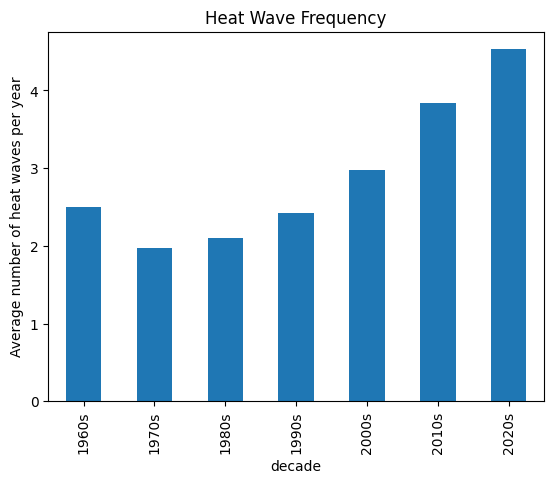

In [18]:
averages = heatwave_nonzero.groupby('decade')['heatwave_count'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average number of heat waves per year')
plt.title('Heat Wave Frequency')
plt.show()

### Heatwave duration

In [19]:
heatwave_duration = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/city_heatwave_duration_1961_2021.csv").drop(columns={'Unnamed: 0'})
heatwave_duration

,year,city_name,AT_min,heatwave_duration
0,1961,Buffalo,6,3
1,1961,Hartford,2,2
2,1961,Jacksonville,30,2
3,1961,Jacksonville,48,2
4,1961,Jacksonville,12,2
...,...,...,...,...
2386,2021,Tampa,4,3
2387,2021,Tampa,6,3
2388,2021,Tampa,20,3
2389,2021,Tampa,12,2


In [20]:
city_numbers_Duration = printCityNumbers(heatwave_duration, years)
city_numbers_Duration

[{1961: 9},
 {1962: 5},
 {1963: 6},
 {1964: 10},
 {1965: 8},
 {1966: 13},
 {1967: 6},
 {1968: 14},
 {1969: 22},
 {1970: 18},
 {1971: 14},
 {1972: 17},
 {1973: 10},
 {1974: 5},
 {1975: 7},
 {1976: 6},
 {1977: 13},
 {1978: 10},
 {1979: 10},
 {1980: 23},
 {1981: 20},
 {1982: 10},
 {1983: 18},
 {1984: 11},
 {1985: 9},
 {1986: 13},
 {1987: 8},
 {1988: 18},
 {1989: 10},
 {1990: 9},
 {1991: 15},
 {1992: 7},
 {1993: 15},
 {1994: 19},
 {1995: 23},
 {1996: 12},
 {1997: 14},
 {1998: 19},
 {1999: 24},
 {2000: 9},
 {2001: 14},
 {2002: 17},
 {2003: 10},
 {2004: 8},
 {2005: 16},
 {2006: 30},
 {2007: 21},
 {2008: 13},
 {2009: 12},
 {2010: 30},
 {2011: 29},
 {2012: 29},
 {2013: 19},
 {2014: 10},
 {2015: 19},
 {2016: 23},
 {2017: 15},
 {2018: 18},
 {2019: 17},
 {2020: 15},
 {2021: 16}]

In [21]:
len(heatwave_duration['city_name'].unique())

48

In [22]:
heatwave_duration['decade'] = heatwave_duration['year'].apply(findDecade)
heatwave_duration

,year,city_name,AT_min,heatwave_duration,decade
0,1961,Buffalo,6,3,1960s
1,1961,Hartford,2,2,1960s
2,1961,Jacksonville,30,2,1960s
3,1961,Jacksonville,48,2,1960s
4,1961,Jacksonville,12,2,1960s
...,...,...,...,...,...
2386,2021,Tampa,4,3,2020s
2387,2021,Tampa,6,3,2020s
2388,2021,Tampa,20,3,2020s
2389,2021,Tampa,12,2,2020s


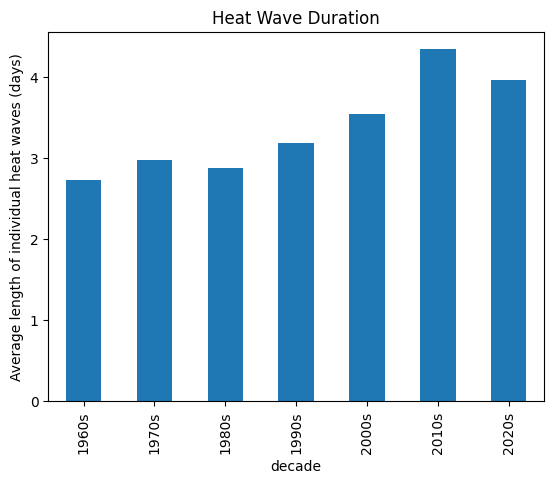

In [23]:
averages = heatwave_duration.groupby('decade')['heatwave_duration'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average length of individual heat waves (days)')
plt.title('Heat Wave Duration')
plt.show()

### Heatwave Season Length

In [24]:
heatwave_length = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/city_heatwave_season_length_1961_2021.csv", dtype = {'year': int}).drop(columns={'Unnamed: 0'})
heatwave_length

,year,city_name,heatwave_season_length
0,1961,Buffalo,3
1,1961,Hartford,2
2,1961,Jacksonville,44
3,1961,Miami,88
4,1961,New Orleans,2
...,...,...,...
885,2021,Portland,47
886,2021,Providence,62
887,2021,Rochester,2
888,2021,Seattle,2


In [25]:
heatwave_2020 = heatwave_length[heatwave_length['year'] == 2020]
heatwave_2020

,year,city_name,heatwave_season_length
859,2020,Austin,64
860,2020,Baton Rouge,66
861,2020,Boston,33
862,2020,Buffalo,41
863,2020,El Paso,3
864,2020,Jacksonville,1
865,2020,Las Vegas,39
866,2020,Miami,218
867,2020,New Orleans,82
868,2020,Providence,36


In [26]:
len(heatwave_length['city_name'].unique())

48

In [27]:
heatwave_length['decade'] = heatwave_duration['year'].apply(findDecade)
heatwave_length

,year,city_name,heatwave_season_length,decade
0,1961,Buffalo,3,1960s
1,1961,Hartford,2,1960s
2,1961,Jacksonville,44,1960s
3,1961,Miami,88,1960s
4,1961,New Orleans,2,1960s
...,...,...,...,...
885,2021,Portland,47,1990s
886,2021,Providence,62,1990s
887,2021,Rochester,2,1990s
888,2021,Seattle,2,1990s


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
heatwave_1960s = heatwave_length[(heatwave_length['year']>= 1961)&(heatwave_length['year']<= 1970)]
heatwave_1960s['decade'] = '1960s'
heatwave_1970s = heatwave_length[(heatwave_length['year']>= 1971)&(heatwave_length['year']<= 1980)]
heatwave_1970s['decade'] = '1970s'
heatwave_1980s = heatwave_length[(heatwave_length['year']>= 1981)&(heatwave_length['year']<= 1990)]
heatwave_1980s['decade'] = '1980s'
heatwave_1990s = heatwave_length[(heatwave_length['year']>= 1991)&(heatwave_length['year']<= 2000)]
heatwave_1990s['decade'] = '1990s'
heatwave_2000s = heatwave_length[(heatwave_length['year']>= 2001)&(heatwave_length['year']<= 2010)]
heatwave_2000s['decade'] = '2000s'
heatwave_2010s = heatwave_length[(heatwave_length['year']>= 2011)&(heatwave_length['year']<= 2020)]
heatwave_2010s['decade'] = '2010s'
heatwave_2020s = heatwave_length[heatwave_length['year'] >= 2021]
heatwave_2020s['decade'] = '2020s'

In [30]:
heatwave_length = pd.concat([heatwave_1960s, heatwave_1970s, heatwave_1980s, heatwave_1990s, heatwave_2000s, heatwave_2010s, heatwave_2020s])
heatwave_length

,year,city_name,heatwave_season_length,decade
0,1961,Buffalo,3,1960s
1,1961,Hartford,2,1960s
2,1961,Jacksonville,44,1960s
3,1961,Miami,88,1960s
4,1961,New Orleans,2,1960s
...,...,...,...,...
885,2021,Portland,47,2020s
886,2021,Providence,62,2020s
887,2021,Rochester,2,2020s
888,2021,Seattle,2,2020s


In [31]:
heatwave_length['decade'].unique()

array(['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'],
      dtype=object)

In [32]:
heatwave_length['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

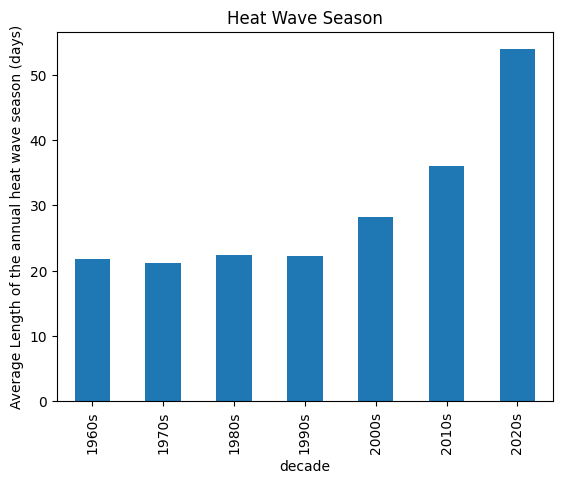

In [33]:
averages = heatwave_length.groupby('decade')['heatwave_season_length'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average Length of the annual heat wave season (days)')
plt.title('Heat Wave Season')
plt.show()

#### Heatwave Intensity

In [34]:
heatwave_intensity = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/city_heatwave_intensity_1961_2021.csv", dtype={'year': int}).drop(columns={'Unnamed: 0'})
heatwave_intensity

,year,city_name,heatwave_intensity
0,1961,Buffalo,4.089491
1,1961,Hartford,1.827083
2,1961,Jacksonville,0.956004
3,1961,Jacksonville,0.956004
4,1961,Jacksonville,0.956004
...,...,...,...
2386,2021,Tampa,3.034205
2387,2021,Tampa,3.660569
2388,2021,Tampa,1.802730
2389,2021,Tampa,1.802730


In [35]:
heatwave_intensity['decade'] = heatwave_intensity['year'].apply(findDecade)
heatwave_intensity

,year,city_name,heatwave_intensity,decade
0,1961,Buffalo,4.089491,1960s
1,1961,Hartford,1.827083,1960s
2,1961,Jacksonville,0.956004,1960s
3,1961,Jacksonville,0.956004,1960s
4,1961,Jacksonville,0.956004,1960s
...,...,...,...,...
2386,2021,Tampa,3.034205,2020s
2387,2021,Tampa,3.660569,2020s
2388,2021,Tampa,1.802730,2020s
2389,2021,Tampa,1.802730,2020s


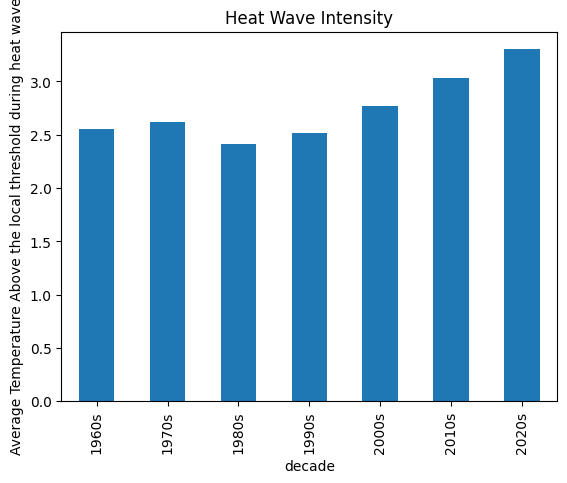

In [36]:
averages = heatwave_intensity.groupby('decade')['heatwave_intensity'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average Temperature Above the local threshold during heat wave(F)')
plt.title('Heat Wave Intensity')
plt.show()